In [4]:
import sys
sys.path.append('../')

import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from src.common.dataset_config import DATASETS_METADATA_PATH

In [6]:
chv_ds_path = '../data/chv'
chv_ds_annots_path = os.path.join(chv_ds_path, 'annotations')
chv_ds_images_path = os.path.join(chv_ds_path, 'images')

# Dataset

In [7]:
images_names = os.listdir(chv_ds_images_path)

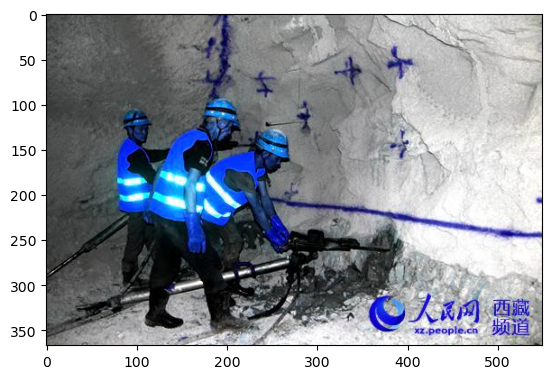

In [11]:
n = 0
img_p = os.path.join(chv_ds_images_path, images_names[n])
img_array = cv2.imread(img_p)
plt.imshow(img_array)

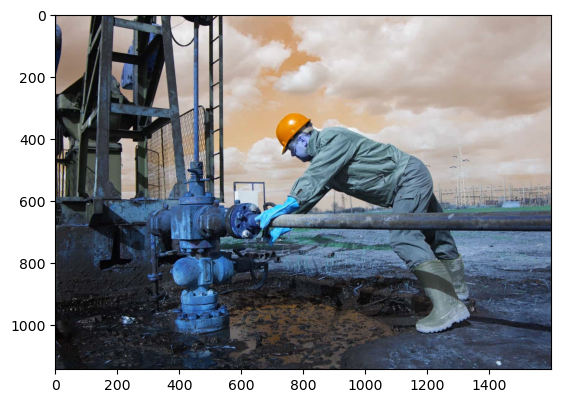

In [12]:
n = 1
img_p = os.path.join(chv_ds_images_path, images_names[n])
img_array = cv2.imread(img_p)
plt.imshow(img_array)